# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [16, 9]

In [2]:
import os

## Reading in the image

In [3]:
if not os.path.exists('100zloty.jpg'):
    !wsl wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg

In [4]:
img = cv2.imread('100zloty.jpg')

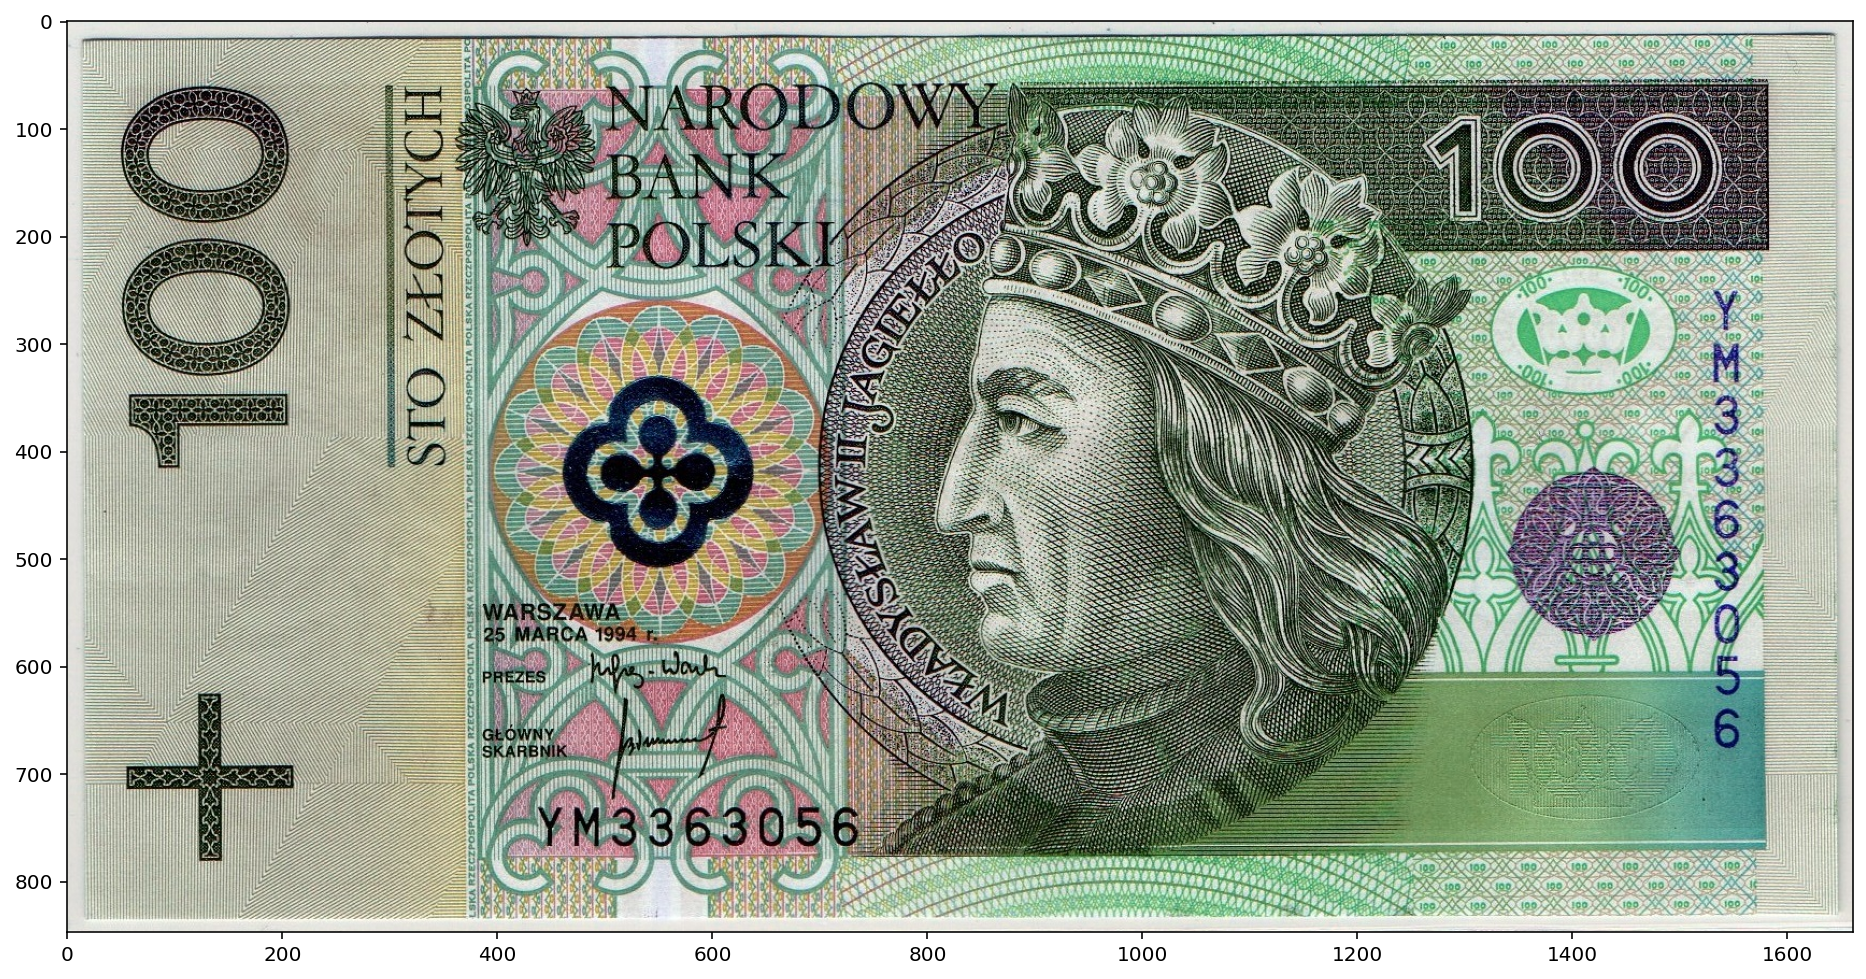

In [5]:
plt.imshow(img)
plt.show()

Transforming the image into a grayscale

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
plt.imshow(img, cmap='gray')
plt.show()

## Decomposition

In [ ]:
def decompose(img):
    decomposed = []
    for shift in range(8):
        flag = 1 << shift
        
        decomposed.append(cv2.bitwise_and(img, flag))
        
    return decomposed

In [ ]:
decomposed = decompose(img)

In [ ]:
for i, dec in enumerate(decomposed):
    plt.imshow(dec, cmap='gray')
    plt.title(f'Decomposed: {i} bit')
    plt.show()

## Image Recover

In [ ]:
for bits in range(1, 9):
    recovered = np.sum(decomposed[-bits:], axis=0)
    
    plt.imshow(recovered, cmap='gray')
    plt.title(f'Recovered image, used {bits} bits')
    plt.show()